# Patterns

## Knitting Code Beautifully

We discussed Pythonic as being an ethos, rather than enforced rules - a subjective achievement that works by consensus. And that that is fundamental to how and why Python as an ecosystem or a language, works.

Design patterns are of a similar nature, and are seen in many languages in different ways - although tend to be discussed much more commonly in traditional enterprise languages, such as C# or Java. Nonetheless, they are highly relevant and, perhaps, an undervalued way of thinking about code quality in Python. Equivalently, and perhaps more importantly, anti-patterns - habits that make code worse or could be considered "Code Smells", indicators of deeper problems.

One helpful language-independent resource from a leading author, is Martin Fowler's website: https://martinfowler.com/bliki/CodeSmell.html for instance. His wiki is a bit like TV Tropes for software projects.

These are not laws - Pythonic philosophy states that practicality beats purity and a hard-to-explain implementation is a bad idea. A literal reading of some design patterns would frequently be at odds with this, so it always comes down to judgement - in my opinion, Pythonic beats established design patterns, when in Python. Some design patterns have language assumptions (such as exception-handling being expensive) that contravene the underlying design principles of Python. The one thing that's critical, as all authors agree on, is that **thinking it through it is the key objective**, not your conclusion.

One final caveat: I know experienced programmers who say that design patterns are an anti-pattern themselves. This is based on the precept that languages should enforce or at least guide good coding practice, and that design patterns are a sticking plaster - certainly, Python goes the other philosophical direction, giving great freedom to the programmer and trusting that they use it wisely. As they say, with great power...

## Domain-Driven Design

This will be a whistle-stop tour - we can delve a bit more into individual concepts in subsequent days, but I am keen that the terms and notions are at least familiar. The first and perhaps more under-described here, is domain-driven design. Tens of thousands of pages have been written about it, debate rages about what the "ubiquitous language" concept that underlies it is, or whether it's useful, but DDD (as it's affectionately known) boils down to:

### The terminology you use in the code should reflect the terminology of the user

Going a little deeper, this is implemented by creating a conceptual "domain model", that is, a conceptual model of the business domain. Then, this is reflected in the code. A follow-on is that you start separating your code more cleanly into layers - a huge number of DDD patterns exist around how best to do this, but sticking to the basics is better than getting bogged down! But, you generally see at least:

* an *application layer*: code handling presentation through UI or APIs; and
* a *domain layer*: code implementing "business logic", i.e. logic rules of the application;
* an *infrastructure layer*: code that deals with DBs, logging, etc

Sometimes it is confused with UML, but UML is only a tool that may or may not be useful - DDD is a way of thinking. I would highly recommend Martin Fowler's work on this, for a broader understanding and deep-dive: https://martinfowler.com/tags/domain%20driven%20design.html

DDD is prevalent in C#, where a lot of best-practice theory in the language ecosystem draws from DDD literature. Perhaps surprisingly for some, PHP's renaissance owed a huge amount to the purism of DDD advocates - PHP syntactically is (IMO) the best wide-spread scripting language for encouraging good programming practice. When PHP advocates in the late 2000s saw the damage poor code was doing to the language's reputation (and theirs!), library writers upped the bar high - the core PHP libraries have extremely strong principles around language style, idiom and design patterns. Modern web frameworks, such as Laravel and (especially) Symfony are excellent for educating new coders in those. But there's a long legacy to shake...

Strangely, Python, which is a beautiful language, is much laxer about this, and gives little guidance or assistance. However, DDD, at its highest level, is a simple concept to start with.

The first step is building a domain model - this is entirely offline. To start, a concept of "entities" is useful: these are conceptual nouns that the domain-expert keeps referring to (also may be thought of as a stakeholder, or client, perhaps). The best way to tease these out is discussion - spot how they use words, what they refer to. The next concept is "relationships" - if they are a bridge-building company, they may talk about how many Arches (an entity) a Bridge (another entity) has. You can tell that one *bridge* has many *arches*. Perhaps a *surveyor* periodically "surveys" a bridge and "signs it off". Finally, there is the business logic: perhaps an application should insist that every *bridge* has an *arch* - this is a business rule - or that a surveyor only signs off a bridge if it is "structurally sound".

A basic way of pulling together a diagram of this is PlantUML (abusing its class diagram syntax...):

In [ ]:
pip install iplantuml

  Preparing metadata (setup.py) ... done
  Created wheel for iplantuml: filename=IPlantUML-0.1.1-py2.py3-none-any.whl size=4894 sha256=4ff8a84db8b0da6846b832eb05d812e3af1a1f1d085d6772c7c1d77f7b7bba31
  Stored in directory: /root/.cache/pip/wheels/ff/d9/f3/4bea79322686f50397e75019c91d0957d079092e5f16e86d23
Successfully built iplantuml


In [ ]:
import iplantuml

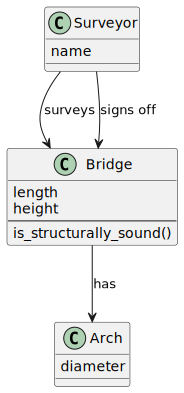

In [ ]:
%%plantuml

@startuml
class Bridge {
    length
    height
    ----
    is_structurally_sound()
}

class Surveyor {
   name
}

class Arch {
    diameter
}

Bridge --> Arch : has
Surveyor --> Bridge : surveys
Surveyor --> Bridge : signs off
@enduml

* a **surveyor** can only **sign off** a **bridge** if it is **structurally sound**
* a **bridge** can have several **arches**
* a **bridge** must have at least one **arch**
* the total of all **diameters** of a **bridge**'s **arches** must be less than the **width** of the **bridge**

---

Strictly, in DDD, class diagrams are not really encouraged (partially because DDD has better tools for breaking down problems too complex for this monolithic approach), but they're adequate for getting you thinking along those lines.

A simple example:

### Exercise: Knit Wit

You have been commissioned to build a web application for choosing knitting patterns. Perhaps a gallery, but maybe different types of wool, or techniques, will show different patterns? Do you want to link out to sales sites? Do you have users?

* Split up into 2 groups. Within your group, nominate one person as a "product owner" and one person as an "architect"
* The product owner is commissioning the app - their word is law! But... (for this exercise) they do not participate in the app design. The other team members should quiz them to understand what the needs are - what entities do they talk about? How are they related? What business rules are there? (e.g. who should see what? does thick wool show the same designs as fine wool?)
* The other team members should guide the architect (who screenshares this notebook) in producing a simple domain model diagram, and bullet point list of business logic rules - don't overcomplicate it! But make sure to use the _language_ of the product owner (entities and relationships)

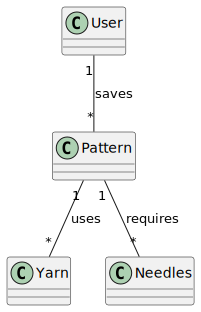

In [ ]:
%%plantuml

@startuml
class Pattern {
}

class Yarn {
}

class Needles {
}

class User {
}

Pattern "1" -- "*" Yarn : uses
Pattern "1" -- "*" Needles : requires
User "1" -- "*" Pattern : saves

@enduml

*   A **Pattern** must specify at least one type of **Yarn** required.
*   A **Pattern** must specify the recommended **Needle** size(s).
*   A **User** must be logged in to **save** a **Pattern** to their profile.
*   A **Pattern** should have a **Difficulty Level**.

----

The second phase is as follows:

* Pass the entity relationship to the other group (architects can save their notebook in the Shared folder)
* Architects: create an Etherpad link that your own group can share between them: https://pad.riseup.net/
* In your groups, try and take the other group's diagram and create classes based on it, relating to entities, and to give them methods and properties using only, where possible, the language that you have been given. Don't worry about implementing them! Just add a comment to the method body to explain what it does. Use the Etherpad link created by your architect to work on it collaboratively.

In [ ]:
class Pattern:
    def __init__(self, name: str, description: str, difficulty_level: str):
        self.name = name
        self.description = description
        self.difficulty_level = difficulty_level
        self.required_yarn = [] # List to hold Yarn objects
        self.required_needles = [] # List to hold Needle objects
        self.saved_by_users = [] # List to hold User objects

    def add_required_yarn(self, yarn):
        # Comment: Method to add a type of required yarn to the pattern
        self.required_yarn.append(yarn)

    def add_required_needles(self, needles):
        # Comment: Method to add required needles to the pattern
        self.required_needles.append(needles)

    def display_details(self):
        # Comment: Method to format and display the pattern details
        pass

    def save(self, user):
        # Comment: Method to save the pattern for a user
        self.saved_by_users.append(user)

In [ ]:
class Yarn:
    def __init__(self, name: str, weight: str, fiber_type: str):
        self.name = name
        self.weight = weight # e.g., "Worsted", "Fingering"
        self.fiber_type = fiber_type # e.g., "Wool", "Cotton"
        # Add more properties here, e.g., color options

    def display_details(self):
        # Comment: Method to format and display the yarn details
        pass

In [ ]:
class Needles:
    def __init__(self, size: str, needle_type: str):
        self.size = size # e.g., "US 8", "5.0 mm"
        self.needle_type = needle_type # e.g., "Straight", "Circular"


In [ ]:
class User:
    def __init__(self, username: str):
        self.username = username
        self.saved_patterns = [] # List to hold Pattern objects

    def save_pattern(self, pattern):
        # Comment: Method to save a pattern to the user's profile
        if pattern not in self.saved_patterns:
            self.saved_patterns.append(pattern)
            # Optional: Add the user to the pattern's saved_by_users list if needed for the rule
            # pattern.saved_by_users.append(self)

    def remove_saved_pattern(self, pattern):
        # Comment: Method to remove a pattern from the user's profile
        if pattern in self.saved_patterns:
            self.saved_patterns.remove(pattern)
            # Optional: Remove the user from the pattern's saved_by_users list
            # pattern.saved_by_users.remove(self)

    def view_saved_patterns(self):
        # Comment: Method to display the list of patterns saved by the user
        pass

    def display_details(self):
        # Comment: Method to format and display the user details
        pass

### Additional Resources

* https://github.com/valignatev/ddd-dynamic
* https://github.com/Softwarepark/exercises/blob/master/transport-tycoon.md - programming challenges and solutions, including in Python, with DDD, using Transport Tycoon scenarios as motivation

## Anaemic Domain Model

This anti-pattern or code smell is about the use of OOP to disguise procedural programming. That is, using core classes as simple data stores, and not thinking hard about them representing some sort of entity - for instance, if I have a User:

In [ ]:
class User:
    def __init__(self, name):
        self.name = name

def user_greeting(user):
    return f"Hi, my name is {user.name}"

def check_user_has_name(user):
    if not user.name:
        raise RuntimeException("User has no name")

ash = User('Ash')
check_user_has_name(ash)
user_greeting(ash)

'Hi, my name is Ash'

This User doesn't do anything! They are only a name, with no actions. But yet... we have a function that makes a user "greet". An obvious question is, if a "user greets someone", why is "greeting" not a "User" method? This is a simplistic example, but you should question a class that has no methods, or business logic in it...

There is a use case for largely methodless classes, "Value Objects", as they are known, but the rule of thumb is that they should only be used when they have no conceptual existence beyond their value - for example, two colours are interchangeable if they have the same hex-code (often a value object), but two users are not interchangeable just because they have the same name!

Another question is why business logic specific to a user shouldn't be part of a user class - could check_user_has_name be something inherent to a user?

In [ ]:
class User:
    def __init__(self, name):
        self.name = name

    def greet(self):
        return f"Hi, my name is {self.name}"

    def check_has_name(self):
        if not self.name:
            raise RuntimeException("I have no name")

ash = User('Ash')
ash.check_has_name()
ash.greet()

'Hi, my name is Ash'

## Call Super

This one is particularly tempting in Python - it's not a massive issue, but it touches on a number of underlying OOP principles.

Lets suppose that we have a library that defines a User that sits in a chair (odd library, but hey).

## Call Super

## Call Super

This one is particularly tempting in Python - it's not a massive issue, but it touches on a number of underlying OOP principles.

Lets suppose that we have a library that defines a User that sits in a chair (odd library, but hey).

In [ ]:
class User:
    in_chair = True

    def stand_up(self):
        self.in_chair = False

    # Don't forget to call this go_to_door method if overriding!!
    def go_to_door(self):
        self.stand_up()

We wish to use this user in our own class.

In [ ]:
# In my own class
class Receptionist(User):
    behind_desk = True

    def go_to_door(self):
        self.behind_desk = False
        super(Receptionist).go_to_door()

Here, any subclass of User, must remember to run `super(MyClass).go_to_door()` or else...

In [ ]:
class Receptionist(User):
    behind_desk = True

    def go_to_door(self):
        self.behind_desk = False

dan = Receptionist()
dan.go_to_door()
dan.in_chair, dan.behind_desk

(True, False)

🤔

All subclasses must remember to call the superclass's method - if they forget, or misread the docs, an inconsistent state is created. This is a specific case of a wider principle. Quoting Martin Fowler:

> Whenever you have to remember to do something every time, that's a sign of a bad API.

How do you deal with that? One option is to use a "hook".

In [ ]:
class User:
    in_chair = True

    def stand_up(self):
        self.in_chair = False

    def go_to_door(self):
        self.stand_up()
        self.do_going_to_door()

    # Override this!
    def do_going_to_door(self):
        pass

In [ ]:
class Receptionist(User):
    behind_desk = True

    def do_going_to_door(self):
        self.behind_desk = False

dan = Receptionist()
dan.go_to_door()
dan.in_chair, dan.behind_desk

(False, False)

Success - Dan is at the door, and not still sitting down or behind a desk.

### Getters and Setters

Particularly tempting if you are coming from a Java or C# background, Python discourages lots of getter and setter methods in code. In part, because Python (for better or worse) philosophically puts much less emphasis on privacy of class members. In part, because it has more Pythonic ways of doing it...

In [ ]:
class Biscuit:
    crumbliness_coefficient = 0.3

    def get_crumbliness_coefficient(self):
        return self.crumbliness_coefficient

    def set_crumbliness_coefficient(self, crumble):
        self.crumbliness_coefficient = crumble

flapjack = Biscuit()
flapjack.set_crumbliness_coefficient(0.9)
flapjack.get_crumbliness_coefficient()

0.9

Python is more focused on succinctness and clarity:

In [ ]:
class Biscuit:
    crumbliness_coefficient = 0.3

flapjack = Biscuit()
flapjack.crumbliness_coefficient = 0.9
flapjack.crumbliness_coefficient

0.9

Of course, there are some cases when this breach of encapsulation is a bit too much, or you need to do some processing.

In [ ]:
class Biscuit:
    _crumbliness_coefficient = 0.3

    @property
    def crumbliness_coefficient(self):
        return self._crumbliness_coefficient

    @crumbliness_coefficient.setter
    def crumbliness_coefficient(self, crumble):
        self._crumbliness_coefficient = crumble

flapjack = Biscuit()
flapjack.crumbliness_coefficient = 0.9
flapjack.crumbliness_coefficient

0.9

Note the use of an underscore to indicate that `_crumbliness_coefficient` should be protected within the class...

In [ ]:
flapjack._crumbliness_coefficient

0.9

...but that is convention. Not generally recommended, but we can go one step further (especially if talking about strictly private methods), and use a double-underscore - Python will enforce this.

In [ ]:
class Biscuit:
    __crumbliness_coefficient = 0.3

    @property
    def crumbliness_coefficient(self):
        return self.__crumbliness_coefficient

    @crumbliness_coefficient.setter
    def crumbliness_coefficient(self, crumble):
        self.__crumbliness_coefficient = crumble

flapjack = Biscuit()
flapjack.crumbliness_coefficient = 0.9
flapjack.crumbliness_coefficient

0.9

In [ ]:
print(flapjack.crumbliness_coefficient)

0.9


# Mix-and-match Types

Realistically, there are occasions where this one is necessary or even desirable, but far fewer than you would see in the wild. In contrast to the previous, coming from a Java or C# background should make you less susceptible...

In [ ]:
class Prisoner:
    def __init__(self, name):
        self.name = name

    def get_number(self):
        if self.name == 'Valjean':
            return 24601
        elif self.name == 'Number Six':
            return 6
        elif self.name == 'Bird man of Alcatraz':
            return '#594'
        else:
            return None

While there are a couple of issues there, this succinctly shows a method that can return three different types. Why is that an issue?

In [ ]:
robert_stroud = Prisoner('Bird man of Alcatraz')
'Prison number: ' + robert_stroud.get_number()

'Prison number: #594'

That all seems fine in a test, but...

In [ ]:
mayor_madeleine = Prisoner('Valjean')
'Prison number: ' + mayor_madeleine.get_number()

TypeError: can only concatenate str (not "int") to str

or...

In [ ]:
mary_stuart = Prisoner('Mary Queen of Scots')
'Prison number: ' + mary_stuart.get_number()

TypeError: can only concatenate str (not "NoneType") to str

One approach for helping constrain types going in and out of a function or method is Python's relatively recent typing syntax.

In [ ]:
class Prisoner:
    def __init__(self, name: str):
        self.name = name

    def get_number(self) -> str:
        if self.name == 'Valjean':
            return 24601
        elif self.name == 'Number Six':
            return 6
        elif self.name == 'Bird man of Alcatraz':
            return '#594'
        else:
            return None


cell_content = In[-1]

Python's type-checking is actually very powerful, allowing C++-style templating of types to be checked - for instance, a sequence of floats or Prisoners (that will throw an exception if it is passed a list with an int in it). A static type-checker is then able to check for these kind of issues - a good example is `mypy`, which is normally run for the command line. If we dump out the previous cell to a file, we can try it...

In [ ]:
with open('prisoner.py', 'w') as f:
    f.write(cell_content)

In [ ]:
!pip install mypy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 90.5 MB/s eta 0:00:00


In [ ]:
!mypy prisoner.py

prisoner.py:7: error: Incompatible return value type (got "int", expected "str")  [return-value]
prisoner.py:9: error: Incompatible return value type (got "int", expected "str")  [return-value]
prisoner.py:13: error: Incompatible return value type (got "None", expected "str")  [return-value]
prisoner.py:16: error: Name "In" is not defined  [name-defined]
Found 4 errors in 1 file (checked 1 source file)


### Exercise: Typing Practice

Create a `Game` class - it should create a property, its `board` that is a 3x3 list of lists or numpy array. You should have a method `move` that can take a string `x` or a string `o`. It should also return a nice board representation when `board_to_string` is called (make it fancy if you like!).

In [ ]:
class Game:
    def __init__(self):
        # Create a 3x3 board using a list of lists
        self.board = [
            [None, None, None],
            [None, None, None],
            [None, None, None]
        ]

    def move(self, counter: str, row: int, col: int):
        # Method to place a counter ('x' or 'o') on the board
        # Basic implementation: just place the counter
        self.board[row][col] = counter

    def board_to_string(self) -> str:
        # Method to return a string representation of the board
        board_str = "-----\n"
        for row in self.board:
            board_str += "|"
            for cell in row:
                board_str += cell if cell is not None else " "
            board_str += "|\n"
        board_str += "-----"
        return board_str


my_game = Game()
my_game.move('x', 0, 0)
my_game.move('o', 1, 1)
my_game.move('x', 1, 0)
my_game.move('o', 0, 0)
print(my_game.board_to_string())

-----
|o  |
|xo |
|   |
-----


### Extension 0

Throw an exception if the cell you wish to move to already has a counter in it.

Now, create two exceptions by subclassing RuntimeError - one for winning, and one for a draw. The move method should fire either of these if appropriate.

In [ ]:
class WinException(RuntimeError):
    """Custom exception for a winning condition."""
    pass

class DrawException(RuntimeError):
    """Custom exception for a draw condition."""
    pass

class Game:
    def __init__(self):
        # Create a 3x3 board using a list of lists
        self.board = [
            [None, None, None],
            [None, None, None],
            [None, None, None]
        ]
        self.moves_count = 0 # Keep track of moves for draw check

    def move(self, counter: str, row: int, col: int):
        # Method to place a counter ('x' or 'o') on the board
        print(f"\nAttempting to move {counter} to ({row}, {col})")
        print(f"Board before move: {self.board}")

        # Check if the cell is already occupied
        if self.board[row][col] is not None:
            print(f"Cell at ({row}, {col}) is occupied. Raising ValueError.")
            raise ValueError(f"Cell at ({row}, {col}) is already occupied.")

        # Place the counter
        self.board[row][col] = counter
        self.moves_count += 1
        print(f"Move successful. Board after move: {self.board}")
        print(f"Moves count: {self.moves_count}")

        # Check for win or draw after the move
        win = self._check_win(counter)
        print(f"_check_win({counter}) returned: {win}")
        if win:
            print(f"Win condition met for {counter}. Raising WinException.")
            raise WinException(f"Player {counter} wins!")

        draw = self._check_draw()
        print(f"_check_draw() returned: {draw}")
        if draw:
            print("Draw condition met. Raising DrawException.")
            raise DrawException("The game is a draw!")

        print("No win or draw yet.")


    def _check_win(self, counter: str) -> bool:
        # Comment: Helper method to check for winning conditions (rows, columns, diagonals)
        # This is a placeholder, full logic needs to be implemented
        # Check rows
        for r in range(3):
            if all(self.board[r][c] == counter for c in range(3)):
                return True
        # Check columns
        for c in range(3):
            if all(self.board[r][c] == counter for r in range(3)):
                return True
        # Check diagonals
        if all(self.board[i][i] == counter for i in range(3)) or \
           all(self.board[i][2-i] == counter for i in range(3)):
            return True
        return False


    def _check_draw(self) -> bool:
        # Comment: Helper method to check for a draw condition
        # This assumes a draw happens when all cells are filled and no one has won
        return self.moves_count == 9 and not self._check_win('x') and not self._check_win('o')


    def board_to_string(self) -> str:
        # Method to return a string representation of the board
        board_str = "-----\n"
        for row in self.board:
            board_str += "|"
            for cell in row:
                board_str += cell if cell is not None else " "
            board_str += "|\n"
        board_str += "-----"
        return board_str



In [ ]:
print("\n--- Testing WinException ---")
my_game = Game()
my_game.move('x', 0, 0) # X in top-left
my_game.move('o', 1, 0) # O in middle-left
my_game.move('x', 0, 1) # X in top-middle
my_game.move('o', 1, 1) # O in middle-middle
my_game.move('o', 1, 1)
    # This move completes the top row for X and should raise a WinException
my_game.move('x', 0, 2)



--- Testing WinException ---

Attempting to move x to (0, 0)
Board before move: [[None, None, None], [None, None, None], [None, None, None]]
Move successful. Board after move: [['x', None, None], [None, None, None], [None, None, None]]
Moves count: 1
_check_win(x) returned: False
_check_draw() returned: False
No win or draw yet.

Attempting to move o to (1, 0)
Board before move: [['x', None, None], [None, None, None], [None, None, None]]
Move successful. Board after move: [['x', None, None], ['o', None, None], [None, None, None]]
Moves count: 2
_check_win(o) returned: False
_check_draw() returned: False
No win or draw yet.

Attempting to move x to (0, 1)
Board before move: [['x', None, None], ['o', None, None], [None, None, None]]
Move successful. Board after move: [['x', 'x', None], ['o', None, None], [None, None, None]]
Moves count: 3
_check_win(x) returned: False
_check_draw() returned: False
No win or draw yet.

Attempting to move o to (1, 1)
Board before move: [['x', 'x', None], 

ValueError: Cell at (1, 1) is already occupied.

### Extension 1

Try adding type-checking to every method of game - both arguments (except `self`) and return values (with `->`)

In [ ]:
from typing import List, Optional # Import necessary types

class WinException(RuntimeError):
    """Custom exception for a winning condition."""
    pass

class DrawException(RuntimeError):
    """Custom exception for a draw condition."""
    pass

class Game:
    def __init__(self):
        # Create a 3x3 board using a list of lists
        # Using Optional[str] because cells can be None or a string ('x' or 'o')
        self.board: List[List[Optional[str]]] = [
            [None, None, None],
            [None, None, None],
            [None, None, None]
        ]
        self.moves_count: int = 0 # Keep track of moves for draw check

    def move(self, counter: str, row: int, col: int) -> None: # move doesn't return a value
        # Method to place a counter ('x' or 'o') on the board
        print(f"\nAttempting to move {counter} to ({row}, {col})")
        print(f"Board before move: {self.board}")

        # Check if the cell is already occupied
        if self.board[row][col] is not None:
            print(f"Cell at ({row}, {col}) is occupied. Raising ValueError.")
            raise ValueError(f"Cell at ({row}, {col}) is already occupied.")

        # Place the counter
        self.board[row][col] = counter
        self.moves_count += 1
        print(f"Move successful. Board after move: {self.board}")
        print(f"Moves count: {self.moves_count}")

        # Check for win or draw after the move
        win = self._check_win(counter)
        print(f"_check_win({counter}) returned: {win}")
        if win:
            print(f"Win condition met for {counter}. Raising WinException.")
            raise WinException(f"Player {counter} wins!")

        draw = self._check_draw()
        print(f"_check_draw() returned: {draw}")
        if draw:
            print("Draw condition met. Raising DrawException.")
            raise DrawException("The game is a draw!")

        print("No win or draw yet.")


    def _check_win(self, counter: str) -> bool:
        # Comment: Helper method to check for winning conditions (rows, columns, diagonals)
        # This is a placeholder, full logic needs to be implemented
        # Check rows
        for r in range(3):
            if all(self.board[r][c] == counter for c in range(3)):
                return True
        # Check columns
        for c in range(3):
            if all(self.board[r][c] == counter for r in range(3)):
                return True
        # Check diagonals
        if all(self.board[i][i] == counter for i in range(3)) or \
           all(self.board[i][2-i] == counter for i in range(3)):
            return True
        return False


    def _check_draw(self) -> bool:
        # Comment: Helper method to check for a draw condition
        # This assumes a draw happens when all cells are filled and no one has won
        return self.moves_count == 9 and not self._check_win('x') and not self._check_win('o')


    def board_to_string(self) -> str:
        # Method to return a string representation of the board
        board_str = "-----\n"
        for row in self.board:
            board_str += "|"
            for cell in row:
                # Ensure cell is treated as a string for concatenation
                board_str += str(cell) if cell is not None else " "
            board_str += "|\n"
        board_str += "-----"
        return board_str



### Extension 2

A useful class that can help constrain values to a discrete set is `Enum`.

In [ ]:
from enum import Enum

class Counter(Enum):
    X = 'x'
    O = 'o'

X = Counter.X
O = Counter.O

my_game.move(X, 1, 0)

In [ ]:
X.value

'x'

Can you adapt your `my_game.board_to_string` to use your Counters? Hint: `X.value` is the string `x`.

In [ ]:
from typing import List, Optional # Import necessary types
from enum import Enum # Import Enum

class Counter(Enum):
    X = 'x'
    O = 'o'

class WinException(RuntimeError):
    """Custom exception for a winning condition."""
    pass

class DrawException(RuntimeError):
    """Custom exception for a draw condition."""
    pass

class Game:
    def __init__(self):
        # Create a 3x3 board using a list of lists
        # Using Optional[str] because cells can be None or a string ('x' or 'o')
        self.board: List[List[Optional[str]]] = [
            [None, None, None],
            [None, None, None],
            [None, None, None]
        ]
        self.moves_count: int = 0 # Keep track of moves for draw check

    # Update type hint for counter to Counter Enum
    def move(self, counter: Counter, row: int, col: int) -> None: # move doesn't return a value
        # Method to place a counter ('x' or 'o') on the board
        print(f"\nAttempting to move {counter.value} to ({row}, {col})") # Use value for printing
        print(f"Board before move: {self.board}")

        # Check if the cell is already occupied
        if self.board[row][col] is not None:
            print(f"Cell at ({row}, {col}) is occupied. Raising ValueError.")
            raise ValueError(f"Cell at ({row}, {col}) is already occupied.")

        # Place the counter - use the string value from the Enum
        self.board[row][col] = counter.value
        self.moves_count += 1
        print(f"Move successful. Board after move: {self.board}")
        print(f"Moves count: {self.moves_count}")

        # Check for win or draw after the move - pass the string value
        win = self._check_win(counter.value)
        print(f"_check_win({counter.value}) returned: {win}")
        if win:
            print(f"Win condition met for {counter.value}. Raising WinException.") # Use value for message
            raise WinException(f"Player {counter.value} wins!")

        draw = self._check_draw()
        print(f"_check_draw() returned: {draw}")
        if draw:
            print("Draw condition met. Raising DrawException.")
            raise DrawException("The game is a draw!")

        print("No win or draw yet.")


    # Update type hint for counter to str (as board stores strings)
    def _check_win(self, counter: str) -> bool:
        # Comment: Helper method to check for winning conditions (rows, columns, diagonals)
        # Check rows
        for r in range(3):
            if all(self.board[r][c] == counter for c in range(3)):
                return True
        # Check columns
        for c in range(3):
            if all(self.board[r][c] == counter for r in range(3)):
                return True
        # Check diagonals
        if all(self.board[i][i] == counter for i in range(3)) or \
           all(self.board[i][2-i] == counter for i in range(3)):
            return True
        return False


    def _check_draw(self) -> bool:
        # Comment: Helper method to check for a draw condition
        # This assumes a draw happens when all cells are filled and no one has won
        return self.moves_count == 9 and not self._check_win(Counter.X.value) and not self._check_win(Counter.O.value)


    def board_to_string(self) -> str:
        # Method to return a string representation of the board
        board_str = "-----\n"
        for row in self.board:
            board_str += "|"
            for cell in row:
                # The board stores strings, so just display the string
                board_str += cell if cell is not None else " "
            board_str += "|\n"
        board_str += "-----"
        return board_str


In [ ]:
from enum import Enum

class Counter(Enum):
    X = 'x'
    O = 'o'

try:
    my_game = Game()
    my_game.move(Counter.X, 0, 0)
    my_game.move(Counter.O, 1, 1)
    my_game.move(Counter.X, 1, 0)
    print(my_game.board_to_string())
except (ValueError, WinException, DrawException) as e:
    print(f"Game over: {e}")


Attempting to move Counter.X to (0, 0)
Board before move: [[None, None, None], [None, None, None], [None, None, None]]
Move successful. Board after move: [[<Counter.X: 'x'>, None, None], [None, None, None], [None, None, None]]
Moves count: 1
_check_win(Counter.X) returned: False
_check_draw() returned: False
No win or draw yet.

Attempting to move Counter.O to (1, 1)
Board before move: [[<Counter.X: 'x'>, None, None], [None, None, None], [None, None, None]]
Move successful. Board after move: [[<Counter.X: 'x'>, None, None], [None, <Counter.O: 'o'>, None], [None, None, None]]
Moves count: 2
_check_win(Counter.O) returned: False
_check_draw() returned: False
No win or draw yet.

Attempting to move Counter.X to (1, 0)
Board before move: [[<Counter.X: 'x'>, None, None], [None, <Counter.O: 'o'>, None], [None, None, None]]
Move successful. Board after move: [[<Counter.X: 'x'>, None, None], [<Counter.X: 'x'>, <Counter.O: 'o'>, None], [None, None, None]]
Moves count: 3
_check_win(Counter.X) r

For your type-checking to work, you will need to now check that the first non-self argument to `move` is a Counter. Have a look at the type-hints docs to see how to do that.

### Extension Squared

If you're feeling brave, can you implement a simple AI to play against you? It will move (and call the `move` method for its own move) when you call a `Game.play` method. To begin with, get it to pick the first empty cell and set its counter there. You should throw an exception if `move` is called on its move, or `play` is called on yours.

Once you have that working, try to get it to play a sensible algorithm. Theoretically, if it goes first and takes the centre cell, and always blocks you getting three, it will at least always draw!

# Sequential Coupling

This is an easy-to-fall-into trap, where methods must be called in a certain order to work. Sometimes it is unavoidable, but a common workaround is to use that hook pattern we saw earlier.

In [ ]:
class Model:
    def build(self):
        self.vector = [1, 2, 3, 4]

    def run(self):
        return sum(self.vector)

model = Model()
model.build()
model.run()

10

In [ ]:
model = Model()
model.run()
model.build()

AttributeError: 'Model' object has no attribute 'vector'

One option is to have a governing method that can call the sequence - a subclass, if needed, only needs to override the "hooks" and the order is still guaranteed.

In [ ]:
class Model:
    def execute(self):
        self.build()
        return self.run()

    def build(self):
        self.vector = [1, 2, 3, 4]

    def run(self):
        return sum(self.vector)

model = Model()
model.execute()

10

Sometimes the issue is resolvable by moving more of the program's functionality inside the class, if steps need to be conducted between method calls. At the least, checking necessary state or steps have occured when a method is called is a way to highlight ordering issues.

In [ ]:
class Model:
    model_built = False

    def build(self):
        self.vector = [1, 2, 3, 4]
        self.model_built = True

    def run(self):
        if not self.model_built:
            raise RuntimeError('The model has not been built - please call build() first.')
        return sum(self.vector)

model = Model()
model.run()
model.build()

RuntimeError: The model has not been built - please call build() first.

# Yo-Yo Problem
## Or too much abstraction in general

Python tends to reduce abstraction compared to statically typed languages - this is part of its paradigm, and comes back to "concise and clear" as principle. The Yo-Yo problem is the idea that too much subclassing can make it very hard to debug code.

`Lifeform -> Animal -> Cow -> Jersey -> MilkingJersey -> MilkingJerseyCalledDaisy`

Possibly better: `Animal -> Cow[type=Jersey, state=milking, name=Daisy]`